<a href="https://colab.research.google.com/github/Mcbryan11/Project/blob/main/Predicting_Price_of_Medical_Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Price of Medical Charges**

This project objective is predicting price of medical charges using machine learning with linear regression. Also Clustering the patient by medical prices.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Read data
data = pd.read_csv("/content/insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Text(0, 0.5, 'Medical Charges')

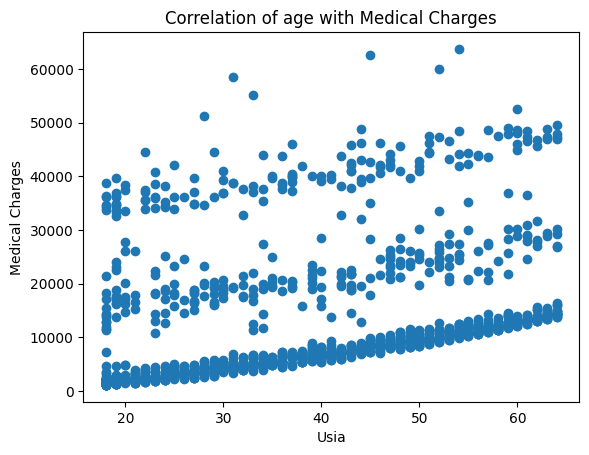

In [6]:
#Correlation of age with medical charges
fig,ax = plt.subplots()
ax.scatter(data["age"],data["charges"])
plt.title("Correlation of age with Medical Charges")
plt.xlabel("Usia")
plt.ylabel("Medical Charges")

Text(0, 0.5, 'Medical Charges')

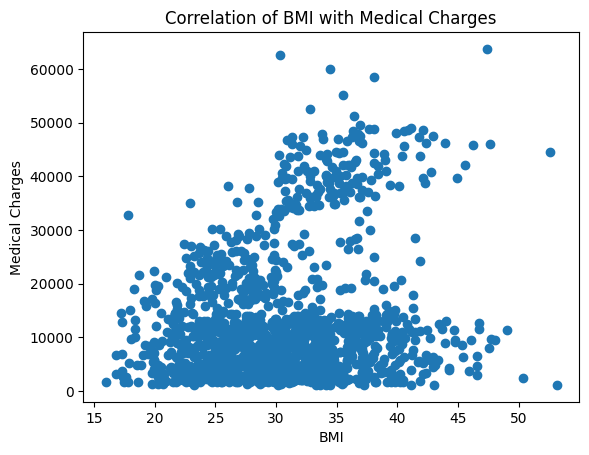

In [5]:
#Correlation of BMI with medical charges
fig,ax = plt.subplots()
ax.scatter(data["bmi"],data["charges"])
plt.title("Correlation of BMI with Medical Charges")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")

In [8]:
average_price_per_smoker = data.groupby('smoker')['charges'].mean().reset_index()

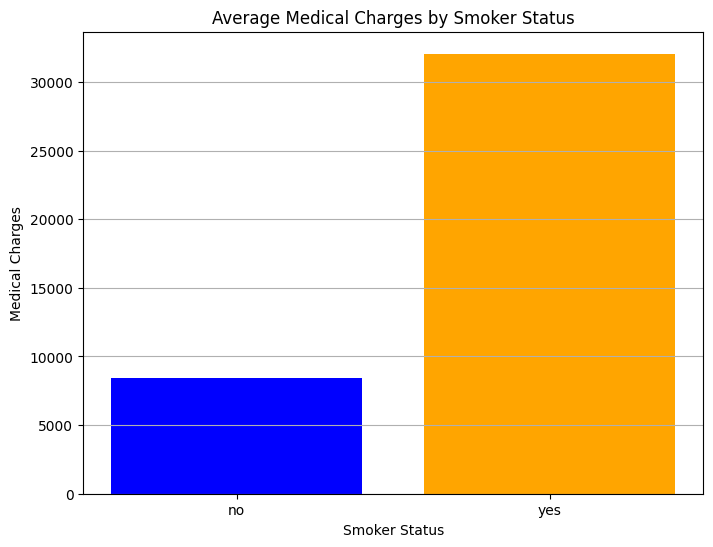

In [17]:
#Correlation of Smoker status with medical charges
plt.figure(figsize=(8,6))
plt.bar(average_price_per_smoker['smoker'], average_price_per_smoker['charges'], color=['blue', 'orange'])
plt.title("Average Medical Charges by Smoker Status")
plt.xlabel("Smoker Status")
plt.ylabel("Medical Charges")
plt.grid(axis='y')
plt.show()

In [11]:
average_price_per_region = data.groupby('region')['charges'].mean().reset_index()

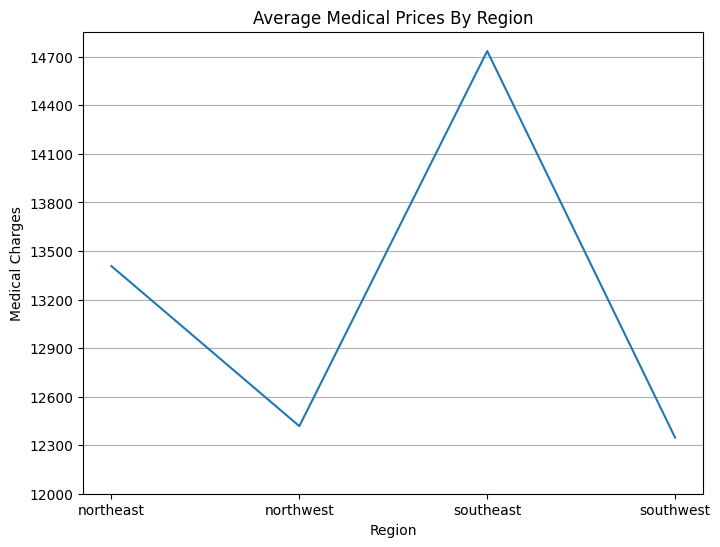

In [16]:
#Correlation of region with medical charges
plt.figure(figsize=(8,6))
plt.plot(average_price_per_region['region'], average_price_per_region['charges'])
plt.title("Average Medical Prices By Region")
plt.xlabel("Region")
plt.ylabel("Medical Charges")
plt.yticks(np.arange(12000,15000,300))
plt.grid(axis='y')
plt.show()

In [14]:
average_price_per_sex = data.groupby('sex')['charges'].mean().reset_index()

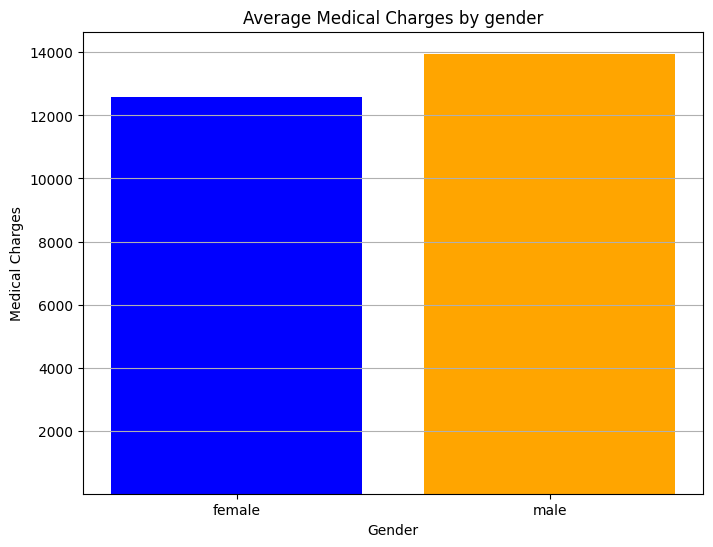

In [15]:
#Correlation of gender with medical charges
plt.figure(figsize=(8,6))
plt.bar(average_price_per_sex['sex'], average_price_per_sex['charges'], color=['blue', 'orange'])
plt.title("Average Medical Charges by gender")
plt.xlabel("Gender")
plt.ylabel("Medical Charges")
plt.grid(axis='y')
plt.yticks(np.arange(2000,16000,2000))
plt.show()

In [19]:
average_price_per_children = data.groupby('children')['charges'].mean().reset_index()

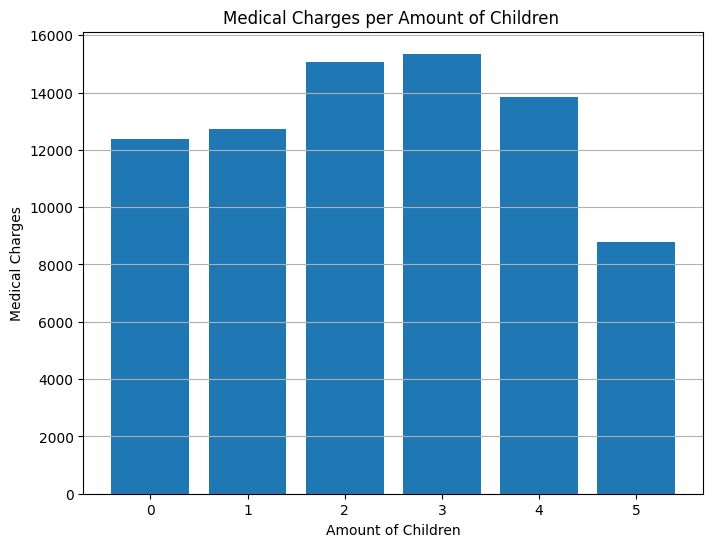

In [20]:
#Correlation of amount of children with medical charges
plt.figure(figsize=(8,6))
plt.bar(average_price_per_children['children'], average_price_per_children['charges'])
plt.title("Medical Charges per Amount of Children ")
plt.xlabel("Amount of Children")
plt.ylabel("Medical Charges")
plt.grid(axis='y')
plt.show()

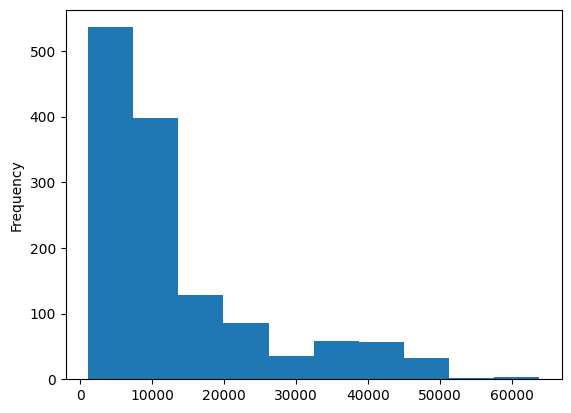

In [13]:
#Data distribution
data.charges.plot.hist();

In [ ]:
data.where(data["charges"]>60000)
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **Correlation analysis**
To determine which feature that have the most relatation with medical charges





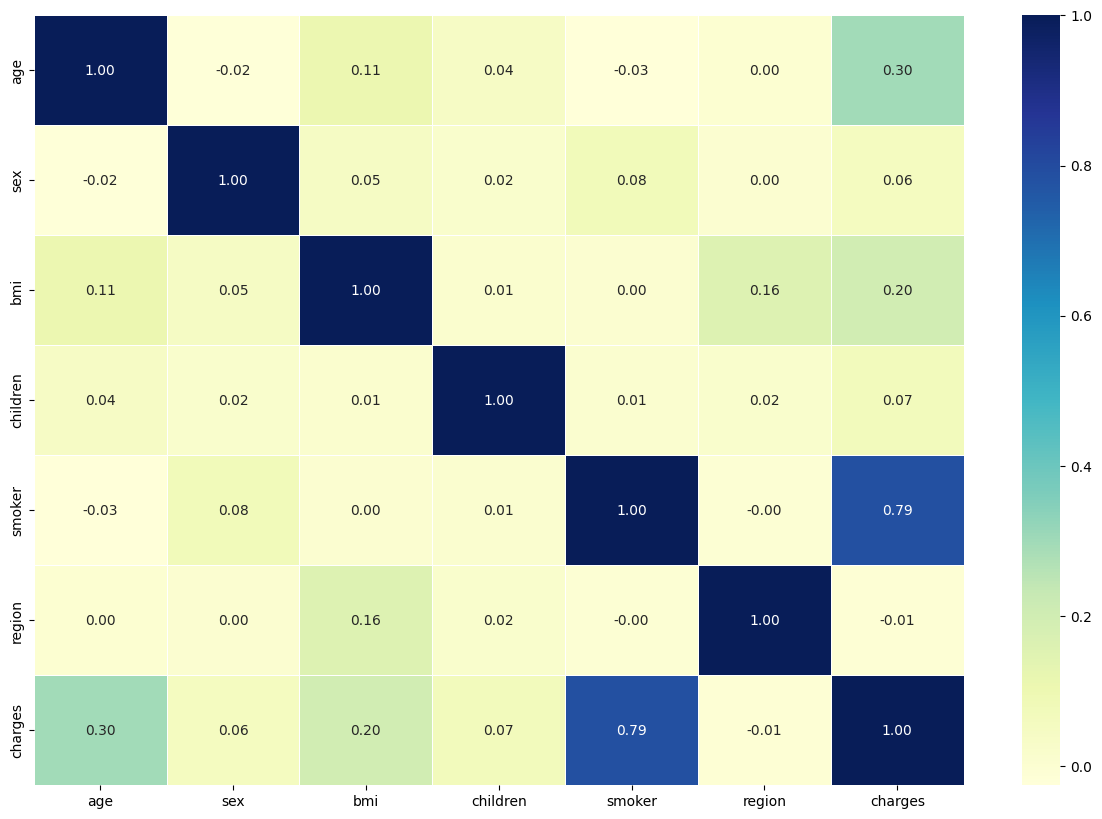

In [ ]:

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# **Data Pereparation**

In [23]:
#Change string data type into integer
data['sex'] = data.sex.replace(to_replace=['female', 'male'], value=[0, 1])
data['smoker'] = data.smoker.replace(to_replace=['no', 'yes'], value=[0, 1])
data['region'] = data.region.replace(to_replace=['northeast', 'northwest', 'southeast', 'southwest'], value=[0, 1, 2, 3])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Model for Prediction**

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X = data[['age', 'sex','bmi', 'children', 'smoker', 'region']]
y = data['charges']

In [25]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [65]:
# Predict result
y_pred = regressor.predict(X_test)

In [66]:
# Score the model
regressor.score(data.drop("charges", axis=1), data.charges)

0.7505773081116578

Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

# Random Forest parameter
param_grid = {"fit_intercept": [True, False],
              "positive": [True, False]}

# Grid Search CV
grid_search = GridSearchCV(regressor, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 231, 

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             return_train_score=True, scoring='accuracy')

In [68]:
best_regressor = grid_search.best_estimator_

In [69]:
best_regressor

LinearRegression(positive=True)

In [70]:
best_regressor.score(X_test, y_test)

0.7978274606303823

In [ ]:
#Predict result
y_best_pred = best_regressor.predict(X_test)

df_preds = pd.DataFrame()
df_preds["Actual Medical Charges"] = y_test
df_preds["Prediction Medical Charges"] = y_best_pred
df_preds

In [ ]:
df_preds = pd.DataFrame()
df_preds["Actual Medical Charges"] = y_test
df_preds["Prediction Medical Charges"] = y_best_pred
df_preds

,Actual Medical Charges,Prediction Medical Charges
578,9724.53000,11461.217784
610,8547.69130,9920.246705
569,45702.02235,37782.650918
1034,12950.07120,15948.078800
198,9644.25250,6880.179534
...,...,...
1084,15019.76005,14536.060672
726,6664.68595,8081.020601
1132,20709.02034,15537.369105
725,40932.42950,33137.972547


In [ ]:
# regression coefficients
print('Coefficients: ', regressor.coef_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Coefficients:  [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
Variance score: 0.7998747145449959


**Model Accuracy**

In [72]:
df_regressor_score = pd.DataFrame()
df_regressor_score["Model Accuracy"] = best_regressor.score(X_test, y_test), regressor.score(data.drop("charges", axis=1), data.charges)
df_regressor_score["Name"] = "Tuning with Grid Search CV", "No Hyperparameter Tuning"
df_regressor_score

,Model Accuracy,Name
0,0.797827,Tuning with Grid Search CV
1,0.750577,No Hyperparameter Tuning


Feature Importances

Text(0.5, 0, 'Features_importances')

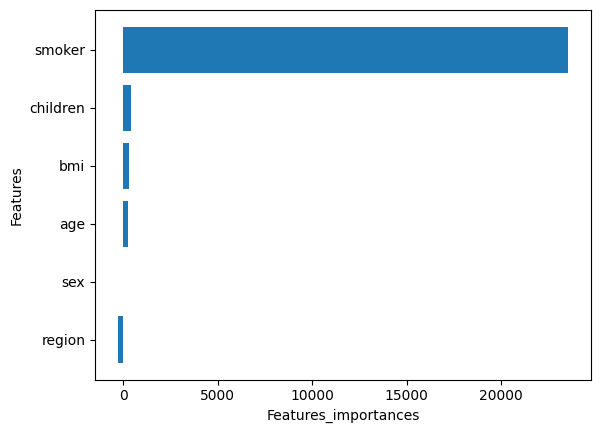

In [ ]:
importances = regressor.coef_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
x = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_ylabel("Features")
ax.set_xlabel("Features_importances")

In [27]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs= -1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
# Prediction result
y_pred_test = model.predict(X_test)     # predicted value of y_test
y_pred_train = model.predict(X_train)   # predicted value of y_train

In [32]:
# Predict result
y_pred = model.predict(X_test)

In [34]:
# Score the model
model.score(data.drop("charges", axis=1), data.charges)

0.9522531392145659

Hyperparameter Tuning using Randomized Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest parameter
rs_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3, 5,10],
          "min_samples_split": np.arange(2, 10, 2),
          "min_samples_leaf":np.arange(2, 10, 2),
          "max_features": ["sqrt", "log2", None],
          "max_samples": [856]}

# Randomized search CV
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                               param_distributions=rs_grid,
                               n_iter=50,
                               cv=5,
                               verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [856],
                                        'min_samples_leaf': array([2, 4, 6, 8]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
rs_model.best_estimator_

RandomForestRegressor(max_depth=5, max_features=None, max_samples=856,
                      min_samples_leaf=8, min_samples_split=4, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [57]:
best_rf_random = rs_model.best_estimator_
best_rf_random.score(X_test, y_test)

0.9043725715426998

Hyperparameter Tuning using Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

# Random Forest parameter
param_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3, 5],
          "min_samples_split": np.arange(2, 10, 2),
          "min_samples_leaf":np.arange(2, 10, 2),
          "max_features": ["sqrt", "log2", None],
          "max_samples": [714]}

# Grid Search CV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 231, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 123, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: continuous is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partiti

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [714],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             return_train_score=True, scoring='accuracy')

In [54]:
best_rf_grid = grid_search.best_estimator_
best_rf_grid

RandomForestRegressor(max_features='sqrt', max_samples=714, min_samples_leaf=2,
                      n_estimators=10, n_jobs=-1, random_state=42)

In [55]:
best_rf_grid.score(X_test, y_test)

0.8723070243772407

**Model Accuracy**

In [60]:
df_model_score = pd.DataFrame()
df_model_score["Model Accuracy"] = best_rf_grid.score(X_test, y_test), best_rf_random.score(X_test, y_test), model.score(data.drop("charges", axis=1), data.charges)
df_model_score["Name"] = "Tuning with Grid Search CV", "Tuning with Randomized Search CV", "No Hyperparameter Tuning"
df_model_score

,Model Accuracy,Name
0,0.872307,Tuning with Grid Search CV
1,0.904373,Tuning with Randomized Search CV
2,0.952253,No Hyperparameter Tuning


**Customer Clusteritation**

In [ ]:
from sklearn.cluster import KMeans

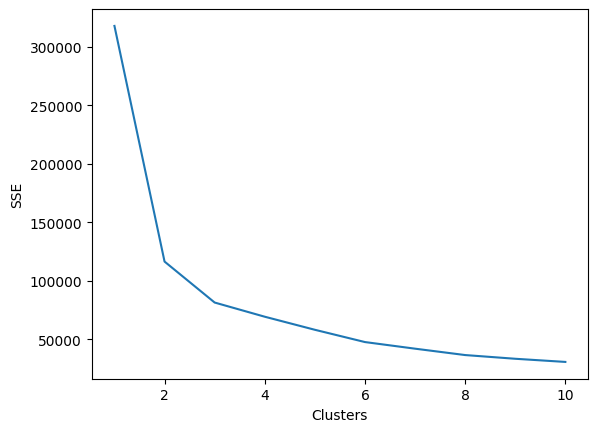

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['bmi', 'age', 'children', 'smoker','charges']])
y_predicted

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
data['cluster']= y_predicted
data.head()

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1


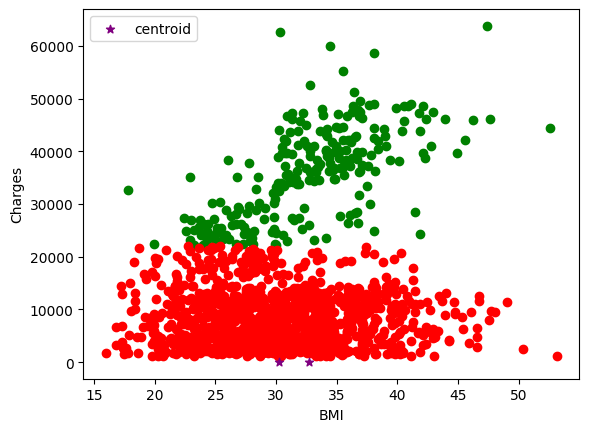

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
plt.scatter(data1.bmi, data1['charges'], color='green')
plt.scatter(data2.bmi, data2['charges'], color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend();